[ 3.43914511 -0.18692825] [ 3.32512949 -0.06531159 -0.00760104] [ 4.36264154 -1.29552587  0.19333685 -0.00823565]


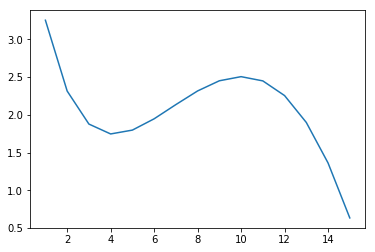

Исходная функция F(x) = sin(x / 5.) * exp(x / 10.) + 5 * exp(-x / 2.) 


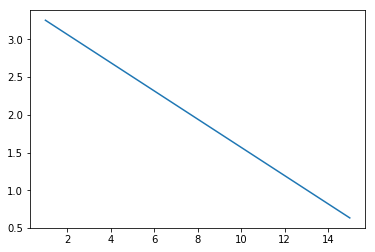

Функция многочлена первой степени F(x) = w0 + w1 * x  


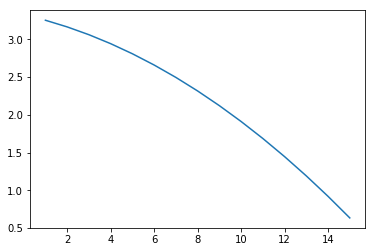

Функция многочлена второй степени F(x) = w0 + w1 * x + w2 * x^2 


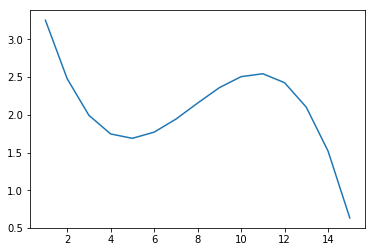

Функция многочлена третьей степени F(x) = w0 + w1 * x + w2 * x^2 + w3 * x^3 


In [14]:
#Короче, суть решения задачи на приближение сложной функции. Итак, нам дана сложная мат. функция и нужно найти функцию,
#у которой формула попроще. Это называется приблизить приблизить или аппроксимировать  если выражаться проф языком. В общем упростить надо
#слишком сложную функцию. Для этого подбирают наиболее подходящее решение (как именно мне пока не понятно), но в данном случае способ
#приближения был определен уже в самом задании. И называется он приближение многочленами. И так, у этого способа (не знаю как у других)
#есть несколько (точнее бесконечно много, но обычно хватает несколько) этапов приближения. Этап первый - приближение многочленом первой степени
#и у первого этапа уже есть формула, которую ранее открыли великие математики. Т.е. ничего выдумывать не надо. Вот формула первого приближения,
#т.е. приближения многочленом первой степени: F(x) = y = w0 + x * w1 И что это нам даёт? А вот что. Если внимательно присмотреться, то это
#классическое линейное уравнение, из которого можно составить матрицу и затем решить её. Только внимание! w0 и w1 здесь это и есть классические
# x1 x2 x3 x4 x5, которые нам раньше приходилось искать в СЛАУ, а x из уравнения многочлена первой степени это и есть коэффициент, который
#пойдёт в левую часть матрицы СЛАУ, в правую (в столбец свободных членов) пойдёт результат вычисления ИСХОДНОЙ функции (не функции 
#приближения многочленом первой степени, а ИСХОДНОЙ, которую нужно приблизить-аппроксимировать), куда вместо х мы подставим нужное
#нам значение из исследуемой области определения функции D(x). Но из одного уравнения систему уравнений, где есть ДВА неизвестных w0 и w1 не 
#решить, поэтому подставляем второе уравнение, где место x будет ещё одно значение оси х из исследуемой нами области определения функции. 
#Просчитаем исходную функции для неё и так у нас появится второй элемент для второго столбца свободных членов, а Х для которого мы второй раз
#просчитывали исходную функцию пойдёт в левую часть СЛАУ в качестве коэффициента. Далее мы строим график после первого приближения и смотрим,
#если результат нам не нравится и он не похож на исходную функцию, то берем формулу для второго приближения, т.е. приближения многочленом второй
#степени. Если график приближения вторым многочленом нас не устраивает, то приближаем третьим и так далее. Может есть какие-то критерии качества
#приближения, кроме визуальных, но пока не могу о них ничего сказать.


import numpy as np
from scipy.linalg import solve
sin = np.sin
exp = np.exp


#ДАНО:
#Задача 2: аппроксимация функции f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)
#Рассмотрим сложную математическую функцию на отрезке [1, 15]:

#РЕШЕНИЕ
#начнем с построения матрицы для многочлена первой степени
#Берем многочлен первой степени w0 + w1*x = y
#Подставляем в него x (1 и 15) и y (вычисляем f от x)
#В точке 1 многочлен первой степени равен: w0 + w1 * 1 = sin(1/5) * exp(1/10) + 5*exp(-1/2) = 3.252
#Вычисляем значение столбца свободных членов для многочлена первой степени при Х=1
result_a = sin(1/5.) * exp(1/10.) + 5*exp(-1/2.)#ДОБАВЛЯЕМ ТОЧКИ В КОНЕЦ ЗНАМЕНАТЕЛЯ, ЭТО ВАЖНО, ИНАЧЕ КРИВО СЧИТАЕТ
#В точке 15 многочлен первой степени равен: w0 + w1 * 15 = sin(15/5) * exp(15/10) + 5*exp(-15/2)  = 0.635
#Вычисляем значение столбца свободных членов для многочлена первой степени при Х=15
result_b = sin(15/5.) * exp(15/10.) + 5*exp(-15/2.)

#Получаем систему уравнений:
# w0 + 1 * w1 
# w0 + 15 * w1
#соответственно, для многочлена первой степени будет матрица вида
# 1 1    result_a
# 1 15   result_b

nash_array = np.array ([[1,1],[1,15]])#создаем массив для многочлена первой степени
nash_array_vektor = np.array ([result_a, result_b])#создаем строку-вектор  из правой части уравнения

reshenie1 = solve (nash_array, nash_array_vektor)


#созданим многочлен второй степени для точек 1,8,15
# w0 + w1 * 1 + w2 * 1^2 =  sin(1 / 5.) * exp(1 / 10.) + 5 * exp(-1 / 2.)
# w0 + w1 * 8 + w2 * 8^2 = sin(8 / 5.) * exp(8 / 10.) + 5 * exp(-8 / 2.)
# w0 + w1 * 15 + w2 * 15^2 = sin(15 / 5.) * exp(15 / 10.) + 5 * exp(-15 / 2.)

#соответственно, для многочлена второй степени будет матрица вида
# 1 1 1
# 1 8 64
# 1 15 225


#Вычисляем значение столбца свободных членов для многочлена второй степени при Х = 1
result_a = sin(1 / 5.) * exp(1 / 10.) + 5 * exp(-1 / 2.)
#Вычисляем значение столбца свободных членов для многочлена второй степени при Х = 8
result_b = sin(8 / 5.) * exp(8 / 10.) + 5 * exp(-8 / 2.)
#Вычисляем значение столбца свободных членов для многочлена второй степени при Х = 15
result_c = sin(15 / 5.) * exp(15 / 10.) + 5 * exp(-15 / 2.)

nash_array = np.array ([[1, 1, 1],[1, 8, 64],[1, 15, 225]])#создаем массив для многочлена второй степени
nash_array_vektor = np.array ([result_a, result_b, result_c])#создаем строку-вектор  из правой части уравнения

reshenie2 = solve (nash_array, nash_array_vektor)



#созданим многочлен третей степени для точек 1,4,10,15
# w0 + w1 * 1 + w2 * 1^2 + w3 * 1^3 =  sin(1 / 5.) * exp(1 / 10.) + 5 * exp(-1 / 2.)
# w0 + w1 * 4 + w2 * 4^2 + w3 * 4^3 = sin(4 / 5.) * exp(4 / 10.) + 5 * exp(-4 / 2.)
# w0 + w1 * 10 + w2 * 10^2 + w3 * 10^3 = sin(10 / 5.) * exp(10 / 10.) + 5 * exp(-10 / 2.)
# w0 + w1 * 15 + w2 * 15^2 + w3 * 15^3 = sin(15 / 5.) * exp(15 / 10.) + 5 * exp(-15 / 2.)

#соответственно, для многочлена третей степени будет матрица вида
# 1 1 1 1
# 1 4 16 4**3
# 1 10 100 10**3
# 1 15 225 15**3

#Вычисляем значение столбца свободных членов для многочлена третей степени при Х = 1
result_a = sin(1 / 5.) * exp(1 / 10.) + 5 * exp(-1 / 2.)
#Вычисляем значение столбца свободных членов для многочлена третей степени при Х = 4
result_b = sin(4 / 5.) * exp(4 / 10.) + 5 * exp(-4 / 2.)
#Вычисляем значение столбца свободных членов для многочлена третей степени при Х = 10
result_c = sin(10 / 5.) * exp(10 / 10.) + 5 * exp(-10 / 2.)
#Вычисляем значение столбца свободных членов для многочлена третей степени при Х = 15
result_d = sin(15 / 5.) * exp(15 / 10.) + 5 * exp(-15 / 2.)

nash_array = np.array ([[1, 1, 1, 1],[1, 4, 16, 4**3],[1, 10, 100, 10**3],[1, 15, 225, 15**3] ])#создаем массив для многочлена третей степени
nash_array_vektor = np.array ([result_a, result_b,result_c,result_d])#создаем строку-вектор  из правой части уравнения

reshenie3 = solve (nash_array, nash_array_vektor)
print reshenie1, reshenie2, reshenie3






#рисуем график исходной функции
import matplotlib.pyplot as plt

######################################################################################
############### ВНИМАНИЕ!!! список значений Х будет общий для исходной функции и трёх функций приближений многочленами
######################################################################################

def f(x):#определяем функцию
    return sin(x / 5.) * exp(x / 10.) + 5 * exp(-x / 2.)

#x = [i for i in range(1, 16)]#второй способ создания списка значений x
x = range (1,16)# создаем список значений Х

y = [f(i) for i in x]

plt.plot (x,y)
plt.show()
print 'Исходная функция F(x) = sin(x / 5.) * exp(x / 10.) + 5 * exp(-x / 2.) '

#Рисуем график многочлена первой степени:
# w0 + x * w1  


def f1(x):#определяем функцию   многочлена первой степени
    return reshenie1[0] + x * reshenie1[1] #вместо w0 и w1 подставляем соответствующие коэффициенты для первого многочлена, которые просчитала программа scipy.linalg.solve ранее

y1 = [f1(i) for i in x]

plt.plot (x,y1)
plt.show()

print 'Функция многочлена первой степени F(x) = w0 + w1 * x  '

#Рисуем график многочлена второй степени:
# w0 + w1 * x + w2 * x^2 


def f2(x):#определяем функцию второго многочлена
    return reshenie2[0] + x * reshenie2[1] + reshenie2[2] * x**2 #вместо w0 и w1 w2 подставляем соответствующие коэффициенты для первого многочлена, которые просчитала программа scipy.linalg.solve ранее

y2 = [f2(i) for i in x]

plt.plot (x,y2)
plt.show()
print 'Функция многочлена второй степени F(x) = w0 + w1 * x + w2 * x^2 '


#Рисуем график многочлена третей степени:
# w0 + w1 * x + w2 * x^2 + w3 * x^3  
  

def f3(x):#определяем функцию многочлена третьей степени
    return reshenie3[0] + x * reshenie3[1] + reshenie3[2] * x**2 + reshenie3[3] * x**3 #вместо w0 и w1 w2 подставляем соответствующие коэффициенты для первого многочлена, которые просчитала программа scipy.linalg.solve ранее

y3 = [f3(i) for i in x]

plt.plot (x,y3)


plt.show()
print 'Функция многочлена третьей степени F(x) = w0 + w1 * x + w2 * x^2 + w3 * x^3 '




